In [1]:
import numpy as np

In [3]:
input_data=np.array([3, 5])
weights={'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

In [4]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()


# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs*weights['output']).sum()

# Print output
print(output)


-39


# Need activation function relu

In [5]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


In [7]:
input_data=[np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights={'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

In [8]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row*weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row*weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs*weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)
        

[52, 63, 0, 148]


# Neural network with 2 hidden layers

In [10]:
weights={'node_0_0': np.array([2, 4]),
 'node_0_1': np.array([ 4, -5]),
 'node_1_0': np.array([-1,  2]),
 'node_1_1': np.array([1, 2]),
 'output': np.array([2, 7])}

In [12]:
input_data=np.array([3, 5])

In [15]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0'] ).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1'] ).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0'] ).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1'] ).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = relu((hidden_1_outputs*weights['output']).sum())
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)


84


# weights that determine the features/interactions in Neural Networks are created by the model training process which sets them to optimize predictive accuracy.


# The last layers capture the most complex interactions.


# Backward propogation

In [19]:
def predict_with_network(input_data,weights):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0'] ).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_1'] ).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # Calculate model output: model_output
    model_output = relu((hidden_0_outputs*weights['output']).sum())
    
    # Return model_output
    return(model_output)

In [20]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)


6
0


In [27]:
input_data=[np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals=[1, 3, 5, 7]
weights_0={'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1={'node_0': np.array([2, 1]),
 'node_1': np.array([1. , 1.5]),
 'output': np.array([1. , 1.5])}

In [28]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row,weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row,weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals,model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals,model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


In [29]:
weights=np.array([0, 2, 1])
input_data=np.array([1, 2, 3])
target=0

In [30]:
# Calculate the predictions: preds
preds = (input_data*weights).sum()

# Calculate the error: error
error = target-preds

# Calculate the slope: slope
slope = 2 * error * input_data

# Print the slope
print(slope)


[-14 -28 -42]


In [31]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights-learning_rate*slope

# Get updated predictions: preds_updated
preds_updated = (input_data*weights_updated).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)


7
5.04


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('hourly_wages.csv')

In [3]:
df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
predictors=df.iloc[:,1:]

In [5]:
target=df.iloc[:,0]

# Specify the model

In [6]:
# Import necessary modules
import numpy
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32,activation='relu'))

# Add the output layer
model.add(Dense(1))


C:\Users\Gaya\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Compile model

### To compile the model, you need to specify the optimizer and loss function to use

In [7]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


# there are many options for backpropogation but we choose adam..

In [8]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors,target,,epochs=10)


Epoch 1/1
534/534 [==============================] - 0s 469us/step - loss: 232.7405


In [9]:
df=pd.read_csv('titanic_all_numeric.csv')

In [10]:
df

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.000000,1,0,7.2500,1,False,0,0,1
1,1,1,38.000000,1,0,71.2833,0,False,1,0,0
2,1,3,26.000000,0,0,7.9250,0,False,0,0,1
3,1,1,35.000000,1,0,53.1000,0,False,0,0,1
4,0,3,35.000000,0,0,8.0500,1,False,0,0,1
5,0,3,29.699118,0,0,8.4583,1,True,0,1,0
6,0,1,54.000000,0,0,51.8625,1,False,0,0,1
7,0,3,2.000000,3,1,21.0750,1,False,0,0,1
8,1,3,27.000000,0,2,11.1333,0,False,0,0,1
9,1,2,14.000000,1,0,30.0708,0,False,1,0,0


In [11]:
predictors =df.drop(['survived'], axis=1).as_matrix()

In [13]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

predictors =df.drop(['survived'], axis=1).as_matrix()
# Convert the target to categorical: target
target = to_categorical(df.survived)

n_cols=predictors.shape[1]
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32,activation='relu',input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2,activation='softmax'))

# Compile the model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
model.fit(predictors,target,epochs=10) # need to specify # of epochs in fit


Epoch 1/10
891/891 [==============================] - 0s 200us/step - loss: 1.9405 - acc: 0.5758
Epoch 2/10
891/891 [==============================] - 0s 36us/step - loss: 0.9714 - acc: 0.6162
Epoch 3/10
891/891 [==============================] - 0s 40us/step - loss: 0.7508 - acc: 0.6442
Epoch 4/10
891/891 [==============================] - 0s 37us/step - loss: 0.6458 - acc: 0.6723
Epoch 5/10
891/891 [==============================] - 0s 35us/step - loss: 0.6683 - acc: 0.6655
Epoch 6/10
891/891 [==============================] - 0s 40us/step - loss: 0.6351 - acc: 0.6891
Epoch 7/10
891/891 [==============================] - 0s 37us/step - loss: 0.6070 - acc: 0.6925
Epoch 8/10
891/891 [==============================] - 0s 36us/step - loss: 0.6141 - acc: 0.6869
Epoch 9/10
891/891 [==============================] - 0s 36us/step - loss: 0.6125 - acc: 0.6779
Epoch 10/10
891/891 [==============================] - 0s 36us/step - loss: 0.6236 - acc: 0.6857


In [15]:
import numpy as np
pred_data=np.array([[2, 34.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 31.0, 1, 1, 26.25, 0, False, 0, 0, 1],
       [1, 11.0, 1, 2, 120.0, 1, False, 0, 0, 1],
       [3, 0.42, 0, 1, 8.5167, 1, False, 1, 0, 0],
       [3, 27.0, 0, 0, 6.975, 1, False, 0, 0, 1],
       [3, 31.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [1, 39.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 7.775, 0, False, 0, 0, 1],
       [2, 39.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 33.0, 1, 0, 53.1, 0, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8875, 1, False, 0, 0, 1],
       [3, 39.0, 0, 0, 24.15, 1, False, 0, 0, 1],
       [2, 35.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 6.0, 4, 2, 31.275, 0, False, 0, 0, 1],
       [3, 30.5, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [3, 23.0, 0, 0, 7.925, 0, False, 0, 0, 1],
       [2, 31.0, 1, 1, 37.0042, 1, False, 1, 0, 0],
       [3, 43.0, 0, 0, 6.45, 1, False, 0, 0, 1],
       [3, 10.0, 3, 2, 27.9, 1, False, 0, 0, 1],
       [1, 52.0, 1, 1, 93.5, 0, False, 0, 0, 1],
       [3, 27.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [1, 38.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 27.0, 0, 1, 12.475, 0, False, 0, 0, 1],
       [3, 2.0, 4, 1, 39.6875, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 6.95, 1, True, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 56.4958, 1, True, 0, 0, 1],
       [2, 1.0, 0, 2, 37.0042, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [1, 62.0, 0, 0, 80.0, 0, False, 0, 0, 0],
       [3, 15.0, 1, 0, 14.4542, 0, False, 1, 0, 0],
       [2, 0.83, 1, 1, 18.75, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 23.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 8.3, 1, False, 0, 0, 1],
       [1, 39.0, 1, 1, 83.1583, 0, False, 1, 0, 0],
       [3, 21.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [3, 32.0, 0, 0, 56.4958, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 29.7, 1, True, 1, 0, 0],
       [3, 20.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [2, 16.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [1, 30.0, 0, 0, 31.0, 0, False, 1, 0, 0],
       [3, 34.5, 0, 0, 6.4375, 1, False, 1, 0, 0],
       [3, 17.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 42.0, 0, 0, 7.55, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 1, True, 0, 0, 1],
       [3, 35.0, 0, 0, 7.8958, 1, False, 1, 0, 0],
       [2, 28.0, 0, 1, 33.0, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 1, 0, 89.1042, 0, True, 1, 0, 0],
       [3, 4.0, 4, 2, 31.275, 1, False, 0, 0, 1],
       [3, 74.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [3, 9.0, 1, 1, 15.2458, 0, False, 1, 0, 0],
       [1, 16.0, 0, 1, 39.4, 0, False, 0, 0, 1],
       [2, 44.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [3, 18.0, 0, 1, 9.35, 0, False, 0, 0, 1],
       [1, 45.0, 1, 1, 164.8667, 0, False, 0, 0, 1],
       [1, 51.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [3, 24.0, 0, 3, 19.2583, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 41.0, 2, 0, 14.1083, 1, False, 0, 0, 1],
       [2, 21.0, 1, 0, 11.5, 1, False, 0, 0, 1],
       [1, 48.0, 0, 0, 25.9292, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 0, True, 0, 0, 1],
       [2, 24.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 42.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [2, 27.0, 1, 0, 13.8583, 0, False, 1, 0, 0],
       [1, 31.0, 0, 0, 50.4958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 9.5, 1, True, 0, 0, 1],
       [3, 4.0, 1, 1, 11.1333, 1, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [1, 47.0, 1, 1, 52.5542, 0, False, 0, 0, 1],
       [1, 33.0, 0, 0, 5.0, 1, False, 0, 0, 1],
       [3, 47.0, 0, 0, 9.0, 1, False, 0, 0, 1],
       [2, 28.0, 1, 0, 24.0, 0, False, 1, 0, 0],
       [3, 15.0, 0, 0, 7.225, 0, False, 1, 0, 0],
       [3, 20.0, 0, 0, 9.8458, 1, False, 0, 0, 1],
       [3, 19.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [1, 56.0, 0, 1, 83.1583, 0, False, 1, 0, 0],
       [2, 25.0, 0, 1, 26.0, 0, False, 0, 0, 1],
       [3, 33.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 22.0, 0, 0, 10.5167, 0, False, 0, 0, 1],
       [2, 28.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 25.0, 0, 0, 7.05, 1, False, 0, 0, 1],
       [3, 39.0, 0, 5, 29.125, 0, False, 0, 1, 0],
       [2, 27.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 19.0, 0, 0, 30.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 2, 23.45, 0, True, 0, 0, 1],
       [1, 26.0, 0, 0, 30.0, 1, False, 1, 0, 0],
       [3, 32.0, 0, 0, 7.75, 1, False, 0, 1, 0]])

# Predicting

In [16]:
# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

[0.4686964  0.5183212  0.8382126  0.5425625  0.35186598 0.34510636
 0.17149828 0.45409977 0.4597752  0.64885294 0.40603918 0.4972925
 0.4549398  0.5078585  0.3598598  0.21221669 0.42001513 0.5538161
 0.22552137 0.49748832 0.75675076 0.43264878 0.17688936 0.44919536
 0.54381657 0.31949037 0.6167444  0.63064456 0.34659457 0.7058384
 0.48292565 0.5433569  0.35587728 0.44165632 0.45868605 0.7467027
 0.45507917 0.35170746 0.62663287 0.5522942  0.45333418 0.48889506
 0.5634607  0.3017368  0.46220383 0.25912976 0.5486729  0.34496173
 0.54351246 0.78651196 0.5194691  0.10679558 0.4732449  0.60690784
 0.5052632  0.45408016 0.91296536 0.5195543  0.44867277 0.35587728
 0.4337217  0.47875854 0.51985127 0.56110513 0.48659346 0.45236054
 0.47560495 0.63565934 0.42077896 0.5099934  0.4064532  0.604964
 0.35971946 0.26369587 0.52263844 0.4551499  0.46252263 0.45497304
 0.34696677 0.71437323 0.5292582  0.3333059  0.46009058 0.4674177
 0.37693033 0.44857883 0.48121867 0.5752273  0.47022957 0.557891
 0.3

# Saving, reloading and using your Model

In [19]:
from keras.models import load_model
model.save('model_file.h5')
my_model = load_model('model_file.h5')
predictions = my_model.predict(pred_data)
probability_true = predictions[:,1]
probability_true

array([0.4686964 , 0.5183212 , 0.8382126 , 0.5425625 , 0.35186598,
       0.34510636, 0.17149828, 0.45409977, 0.4597752 , 0.64885294,
       0.40603918, 0.4972925 , 0.4549398 , 0.5078585 , 0.3598598 ,
       0.21221669, 0.42001513, 0.5538161 , 0.22552137, 0.49748832,
       0.75675076, 0.43264878, 0.17688936, 0.44919536, 0.54381657,
       0.31949037, 0.6167444 , 0.63064456, 0.34659457, 0.7058384 ,
       0.48292565, 0.5433569 , 0.35587728, 0.44165632, 0.45868605,
       0.7467027 , 0.45507917, 0.35170746, 0.62663287, 0.5522942 ,
       0.45333418, 0.48889506, 0.5634607 , 0.3017368 , 0.46220383,
       0.25912976, 0.5486729 , 0.34496173, 0.54351246, 0.78651196,
       0.5194691 , 0.10679558, 0.4732449 , 0.60690784, 0.5052632 ,
       0.45408016, 0.91296536, 0.5195543 , 0.44867277, 0.35587728,
       0.4337217 , 0.47875854, 0.51985127, 0.56110513, 0.48659346,
       0.45236054, 0.47560495, 0.63565934, 0.42077896, 0.5099934 ,
       0.4064532 , 0.604964  , 0.35971946, 0.26369587, 0.52263

In [23]:
def get_new_model(input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [28]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model(input_shape=(n_cols,))
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    
    # Fit the model
    model.fit(predictors,target,epochs=10)
    



Testing model with learning rate: 0.000001

Epoch 1/10
891/891 [==============================] - 0s 457us/step - loss: 1.1269 - acc: 0.6902
Epoch 2/10
891/891 [==============================] - 0s 40us/step - loss: 1.1250 - acc: 0.6902
Epoch 3/10
891/891 [==============================] - 0s 44us/step - loss: 1.1231 - acc: 0.6902
Epoch 4/10
891/891 [==============================] - 0s 49us/step - loss: 1.1213 - acc: 0.6902
Epoch 5/10
891/891 [==============================] - 0s 42us/step - loss: 1.1194 - acc: 0.6902
Epoch 6/10
891/891 [==============================] - 0s 45us/step - loss: 1.1176 - acc: 0.6902
Epoch 7/10
891/891 [==============================] - 0s 45us/step - loss: 1.1157 - acc: 0.6902
Epoch 8/10
891/891 [==============================] - 0s 42us/step - loss: 1.1139 - acc: 0.6902
Epoch 9/10
891/891 [==============================] - 0s 44us/step - loss: 1.1121 - acc: 0.6902
Epoch 10/10
891/891 [==============================] - 0s 43us/step - loss: 1.1102 - acc:

In [30]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors,target,validation_split=0.3,epochs=10)


Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 1s 980us/step - loss: 0.8286 - acc: 0.6067 - val_loss: 0.7059 - val_acc: 0.6866
Epoch 2/10
623/623 [==============================] - 0s 66us/step - loss: 0.7019 - acc: 0.6629 - val_loss: 0.6306 - val_acc: 0.6978
Epoch 3/10
623/623 [==============================] - 0s 71us/step - loss: 0.6859 - acc: 0.6372 - val_loss: 0.5176 - val_acc: 0.7500
Epoch 4/10
623/623 [==============================] - 0s 67us/step - loss: 0.5870 - acc: 0.6950 - val_loss: 0.5877 - val_acc: 0.7239
Epoch 5/10
623/623 [==============================] - 0s 67us/step - loss: 0.5999 - acc: 0.6886 - val_loss: 0.5113 - val_acc: 0.7276
Epoch 6/10
623/623 [==============================] - 0s 72us/step - loss: 0.6034 - acc: 0.6886 - val_loss: 0.4919 - val_acc: 0.7687
Epoch 7/10
623/623 [==============================] - 0s 79us/step - loss: 0.6927 - acc: 0.6902 - val_loss: 0.4839 - val_acc: 0.7687
Epoch 8/10
623/623 [==

In [35]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=3)

# Fit the model
model.fit(predictors,target,epochs=30,validation_split=0.3,callbacks=[early_stopping_monitor])


Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 1s 1ms/step - loss: 0.7538 - acc: 0.6292 - val_loss: 0.5808 - val_acc: 0.7388
Epoch 2/30
623/623 [==============================] - 0s 72us/step - loss: 0.7770 - acc: 0.6067 - val_loss: 0.6180 - val_acc: 0.7127
Epoch 3/30
623/623 [==============================] - 0s 93us/step - loss: 0.6833 - acc: 0.6709 - val_loss: 0.6338 - val_acc: 0.7090
Epoch 4/30
623/623 [==============================] - 0s 74us/step - loss: 0.7049 - acc: 0.6485 - val_loss: 0.5357 - val_acc: 0.7351
Epoch 5/30
623/623 [==============================] - 0s 85us/step - loss: 0.5944 - acc: 0.7095 - val_loss: 0.5572 - val_acc: 0.7649
Epoch 6/30
623/623 [==============================] - 0s 90us/step - loss: 0.5883 - acc: 0.7095 - val_loss: 0.5015 - val_acc: 0.7575
Epoch 7/30
623/623 [==============================] - 0s 88us/step - loss: 0.5738 - acc: 0.7432 - val_loss: 0.6689 - val_acc: 0.6418
Epoch 8/30
623/623 [====

In [39]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape = input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))

# Compile the model
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])




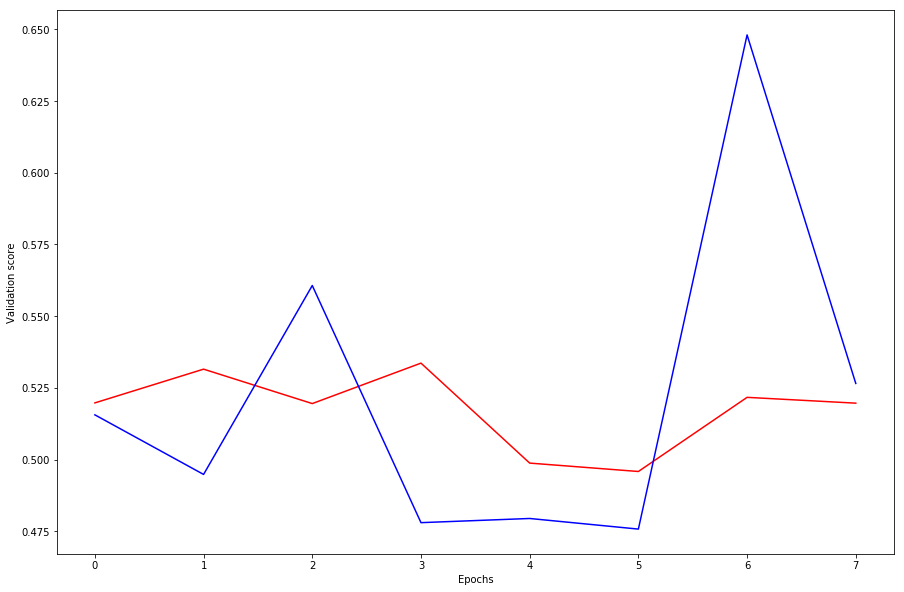

In [42]:
import matplotlib.pyplot as plt
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu', input_shape=input_shape))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.figure(figsize=(15,10))
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


# so in the above graph which outputs new results each time we run.. you can observe that blue line which is model with hidden layers equal to 100 shows better than red model with hidden layers equal to 10... basically the lower val_loss the better model in prediction accuracy

In [53]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_1 = Sequential()

# Add the first, second, and third hidden layers
model_1.add(Dense(50, activation='relu',input_shape=input_shape))
model_1.add(Dense(2,activation='softmax'))
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

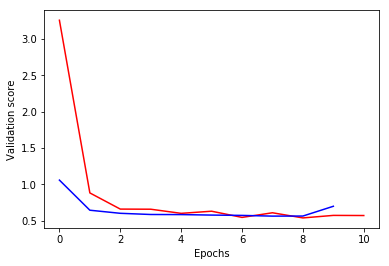

In [54]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu',input_shape=input_shape))
model_2.add(Dense(50, activation='relu',input_shape=input_shape))
model_2.add(Dense(50, activation='relu',input_shape=input_shape))

# Add the output layer
model_2.add(Dense(2,activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


# As before each time we run code it outputs different results... nevertheless when we have data on hand depending on it we need to construct neural networks with different architectures

# Digit recognition

In [62]:
df=pd.read_csv('mnist.csv')

In [63]:
df

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X=df.iloc[:,1:]

In [89]:
y=df.iloc[:,0]

In [90]:
from keras.utils import to_categorical
y=to_categorical(y)
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50,activation='relu',input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50,activation='relu',input_shape=(784,)))

# Add the output layer
model.add(Dense(10,activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
model.fit(X,y,validation_split=0.3, epochs=40)


Train on 1400 samples, validate on 600 samples
Epoch 1/40
1400/1400 [==============================] - 2s 1ms/step - loss: 11.3005 - acc: 0.2850 - val_loss: 11.0327 - val_acc: 0.3050
Epoch 2/40
1400/1400 [==============================] - 0s 158us/step - loss: 9.9991 - acc: 0.3729 - val_loss: 10.6262 - val_acc: 0.3367
Epoch 3/40
1400/1400 [==============================] - 0s 156us/step - loss: 9.5144 - acc: 0.4014 - val_loss: 9.3311 - val_acc: 0.4133
Epoch 4/40
1400/1400 [==============================] - 0s 154us/step - loss: 8.4532 - acc: 0.4700 - val_loss: 8.6489 - val_acc: 0.4533
Epoch 5/40
1400/1400 [==============================] - 0s 156us/step - loss: 8.2133 - acc: 0.4821 - val_loss: 8.6145 - val_acc: 0.4567
Epoch 6/40
1400/1400 [==============================] - 0s 154us/step - loss: 7.9169 - acc: 0.5036 - val_loss: 8.4319 - val_acc: 0.4733
Epoch 7/40
1400/1400 [==============================] - 0s 157us/step - loss: 7.4838 - acc: 0.5286 - val_loss: 8.1710 - val_acc: 0.4867


In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_155 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_156 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_157 (Dense)            (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________
